Dataset from Kaggle : The "Music Genre Classification"
Source: https://www.kaggle.com/datasets/purumalgi/music-genre-classification/

### Import Libraries

In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from scipy.spatial import distance # use for question 3
sb.set() 

### Data Preparation

In [74]:
musicdata = pd.read_csv('train.csv')
musicdata.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [75]:
print("Data type : ", type(musicdata))
print("Data dims : ", musicdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17996, 17)


In [76]:
print(musicdata.dtypes)

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


In [77]:
musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

There are `17` variables/columns and `17996` rows in the dataset.
The response varibale seems  to be `Popularity`, while the remaining `16` variables are most likely predictors.
The following columns seems to be <b>Numeric</b>:
- Popularity
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_in min/ms

Meanwhile, these columns seems to be <b>Categorical</b>:
- Artist Name
- Track Name
- key
- mode
- time_signature
- Class

Description of the dataset, as available on Kaggle, is as follows:
| <b>Column</b> | <b>Description</b> |
| :- | :- |
|  Artist Name | The names of artists who performed the track. If there is more than one artist, it is seperated by ','. |
|  Track Name | The name of the track. |
|  Popularity | The popularity of the track. Value ranges from 1 to 100 based on the total number of plays. |
|  danceability | Describes how suitable a track is for dancing. Value of 0.0 being least danceable and 1.0 being most danceable.  |
|  energy | Measures the overall intensity of a song.  |
|  key | The overall key the track is in. The values map to pitches using the standard Pitch Class notation. |
|  loudness | The overall loudness of a track in decibels. |
|  mode | Refers to whether a track is major or minor. Major is represented by 1, while minor is represented by 0. |
|  speechiness | Detects the presence of spoken words in a track. |
|  acousticness | The name of the track. |
|  instrumentalness | Indicates the likelihood of a track being acoustic, measured on a scale from 0.0 to 1.0. 1.0 represents high confidence the track is acoustic.|
|  liveness | Measures the likelihood of a live performance in the recording, ranging from 0.0 to 1.0. Higher values indicate a greater probability of a live recording. |
|  valence | Measures the level of positive emotion conveyed by a track, ranging from 0.0 to 1.0. Higher values indicate a more positive mood, while lower values suggest a more negative mood. |
|  tempo | The overall estimated speed of track in beats per minute (BPM). |
|  duration_in min/ms | The duration of the track in milliseconds. |
|  time_signature | The estimated number of beats in each bar. |
|  Class | Represents the genre of the track. |



Since the variable popularity is numerical and it ranges from 0 to 100, it is difficult to distinguish how popular a song is. 
We have added a new variable 'Popularity Rating' where we classified the popularity data into four categories based on the popularity score. 
Songs with a popularity score from :
- 0 to 25 are categorized as 'Not Popular'
- 26 to 50 are classified as 'Slightly Popular'
- 51 to 75 are labeled as 'Popular'
- 76 to 100 are designated as 'Very Popular'

In [78]:
def popularity(row):
    if 0 <= row['Popularity'] <= 25:
        return 'Not popular'
    elif 26 <= row['Popularity'] <= 50:
        return 'Slightly popular'
    elif 51 <= row['Popularity'] <= 75:
        return 'Popular'
    elif 76 <= row['Popularity'] <= 100:
        return 'Very popular'
    else:
        return 'Unknown'

musicdata['Popularity Rating'] = musicdata.apply(lambda row: popularity(row), axis=1)

print(musicdata[['Popularity','Popularity Rating']])

       Popularity Popularity Rating
0            60.0           Popular
1            54.0           Popular
2            35.0  Slightly popular
3            66.0           Popular
4            53.0           Popular
...           ...               ...
17991        35.0  Slightly popular
17992        27.0  Slightly popular
17993        34.0  Slightly popular
17994        29.0  Slightly popular
17995        43.0  Slightly popular

[17996 rows x 2 columns]


In [79]:
# Missing values in each row
missing_values_per_row = musicdata.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (musicdata.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

11813 row(s) have 0 missing values
5568 row(s) have 1 missing values
594 row(s) have 2 missing values
21 row(s) have 3 missing values
Total number of rows with missing values: 6183


# Exploratory Data Analysis

C:\Users\cianm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Songs across Popularity Ratings')

<Figure size 2400x400 with 0 Axes>

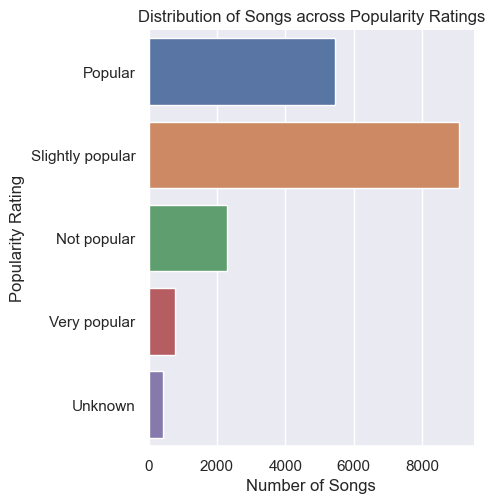

In [80]:
#to see songs are more inclined to which level of popularity
f = plt.figure(figsize=(24, 4))
sb.catplot(y = 'Popularity Rating', data = musicdata, kind="count")
plt.xlabel('Number of Songs')
plt.title('Distribution of Songs across Popularity Ratings')

The categorical plot reveals that the majority of songs fall into the <b>'Slightly Popular'</b> category, with over 8000 songs, while the <b>'Very Popular'</b> category has the fewest number of songs.

Popularity Rating
Not popular         0.519983
Popular             0.568826
Slightly popular    0.525903
Unknown             0.541383
Very popular        0.642718
Name: danceability, dtype: float64


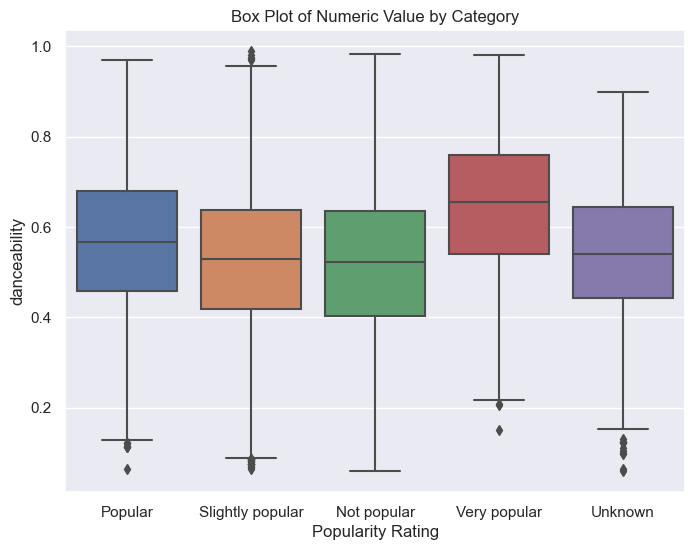

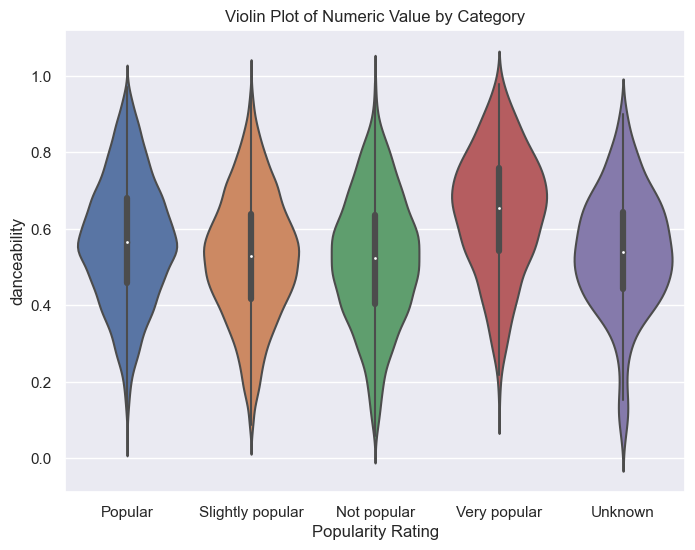

In [81]:
# Group by 'Category' and calculate mean of 'Numeric'
grouped_data = musicdata.groupby('Popularity Rating')['danceability'].mean()
 
# Display grouped data
print(grouped_data)
 
# Box Plot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Popularity Rating', y='danceability', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('danceability')
plt.title('Box Plot of Numeric Value by Category')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sb.violinplot(x='Popularity Rating', y='danceability', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('danceability')
plt.title('Violin Plot of Numeric Value by Category')
plt.show()

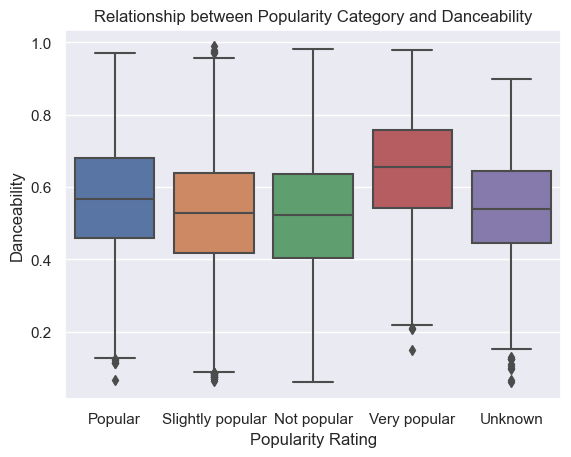

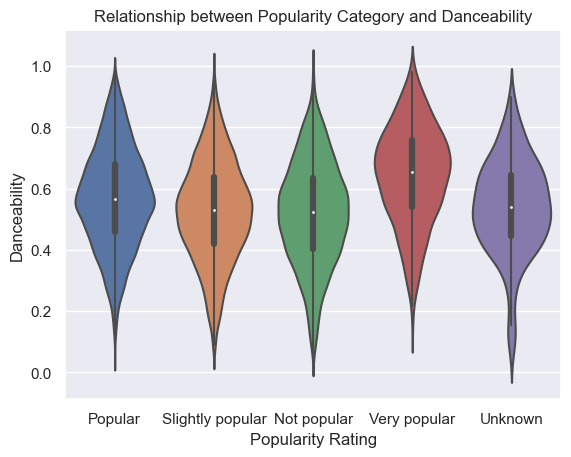

In [82]:
sb.boxplot(x='Popularity Rating', y='danceability', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('Danceability')
plt.title('Relationship between Popularity Category and Danceability')
plt.show()

sb.violinplot(x='Popularity Rating', y='danceability', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('Danceability')
plt.title('Relationship between Popularity Category and Danceability')
plt.show()

Based on the box plot, it is evident that for songs categorized as 'Very Popular,' the interquartile range of danceability spans from 0.5 to 0.7, indicating that 50% of the data falls within this range. This suggests a trend where songs with higher danceability ratings tend to be more popular than those with lower danceability ratings.

Popularity Rating
Not popular        -8.703820
Popular            -7.408369
Slightly popular   -8.068914
Unknown            -8.826393
Very popular       -6.706020
Name: loudness, dtype: float64


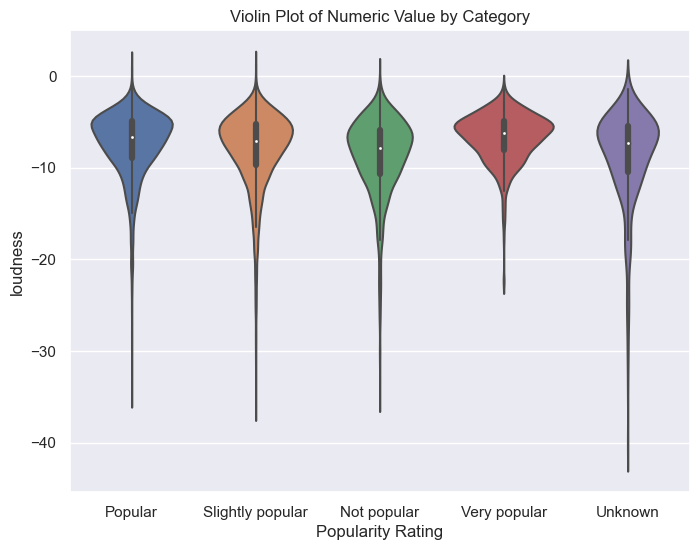

In [83]:
# Group by 'Popularity Rating' and calculate mean of 'energy'
grouped_data_loud = musicdata.groupby('Popularity Rating')['loudness'].mean()
 
# Display grouped data
print(grouped_data_loud)

# Violin Plot
plt.figure(figsize=(8, 6))
sb.violinplot(x='Popularity Rating', y='loudness', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('loudness')
plt.title('Violin Plot of Numeric Value by Category')
plt.show()

Popular: The highest occurrence of 0.9 energy 


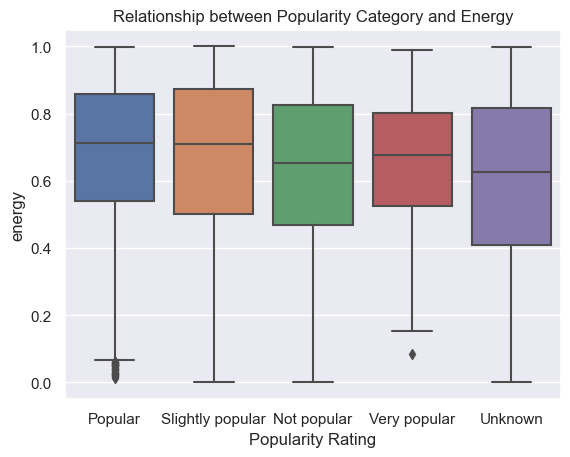

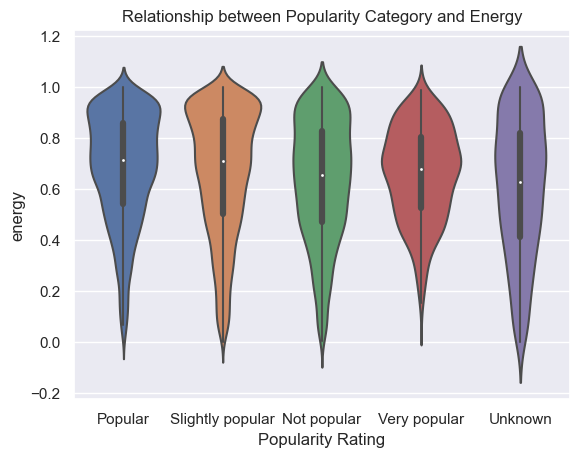

In [84]:
sb.boxplot(x='Popularity Rating', y='energy', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('energy')
plt.title('Relationship between Popularity Category and Energy')
plt.show()

sb.violinplot(x='Popularity Rating', y='energy', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('energy')
plt.title('Relationship between Popularity Category and Energy')
plt.show()

From the violin plot, it can be seen that Very Popular, Polular, and Slightly Popular are skewed negatively while not popular shows a high variance indicating a broader distribution of energy levels.

In [85]:
# Categorical Predictors
musicdata[['Artist Name']].describe()

,Artist Name
count,17996
unique,9149
top,Backstreet Boys
freq,69


Among 17,966 songs, Backstreet Boys has 69 of its songs listed

In [86]:
top20 = musicdata[['Artist Name']].value_counts();
top20.head(20)

Artist Name       
Backstreet Boys       69
Westlife              60
Britney Spears        54
Eyal Golan            48
Omer Adam             48
Shlomo Artzi          39
The Rolling Stones    38
Arik Einstein         35
Itay Levi             35
Moshe Peretz          34
Dudu Aharon           34
Hadag Nahash          33
Yehudit Ravitz        31
U2                    30
Lata Mangeshkar       28
Metallica             27
AC/DC                 27
Dudu Tassa            26
Sarit Hadad           26
The Beatles           25
Name: count, dtype: int64

#### Summary of Artists in the dataset
Out of the 17,996 songs in the dataset, there are 9,149 unique artist names present in the dataset. This shows that there is a diverse range of musical acts represented in the dataset.
<br>
`Backstreet Boys` is the most frequently occurring artist in the dataset with 69 songs, followed by `Westlife` with 60 songs and `Britney Spears` with 54 songs.
<p>The presence of internationally renowned artists like `Backstreet Boys`, `Britney Spears` and `The Beatles` among the top 20 indicates their popularity and influence within the dataset.</p>

#### Relationship between the Top 20 Artists and Popularity

In [87]:
top20 = musicdata['Artist Name'].value_counts()
top_20_artists = top20.head(20).index.tolist()  # Extracting the top 20 artist names
print(top_20_artists)  # Printing out the top 20 artist names

top_20_data = musicdata[musicdata['Artist Name'].isin(top_20_artists)]  # Filtering the original DataFrame
top_20_data.head()  # Printing out the DataFrame containing only rows with the top 20 artists

# You can then analyze the relationship between the top 20 artists and the popularity category
#popularity_artist_counts = top_20_data.groupby(['Popularity Rating', 'Artist Name']).size().unstack(fill_value=0)
#print(popularity_artist_counts.dtypes)
# Calculate the frequency of each popularity rating for each artist among the top 20
popularity_artist_counts = top_20_data.groupby(['Artist Name', 'Popularity Rating']).size().unstack(fill_value=0)

# Print out the resulting DataFrame
print(popularity_artist_counts)


['Backstreet Boys', 'Westlife', 'Britney Spears', 'Omer Adam', 'Eyal Golan', 'Shlomo Artzi', 'The Rolling Stones', 'Arik Einstein', 'Itay Levi', 'Moshe Peretz', 'Dudu Aharon', 'Hadag Nahash', 'Yehudit Ravitz', 'U2', 'Lata Mangeshkar', 'AC/DC', 'Metallica', 'Dudu Tassa', 'Sarit Hadad', 'The Beatles']
Popularity Rating   Not popular  Popular  Slightly popular  Unknown  \
Artist Name                                                           
AC/DC                         0       15                 1        0   
Arik Einstein                 9        0                26        0   
Backstreet Boys               7       13                48        0   
Britney Spears                0       15                25        9   
Dudu Aharon                  26        0                 8        0   
Dudu Tassa                   11        0                15        0   
Eyal Golan                    0        1                47        0   
Hadag Nahash                 16        0                17  

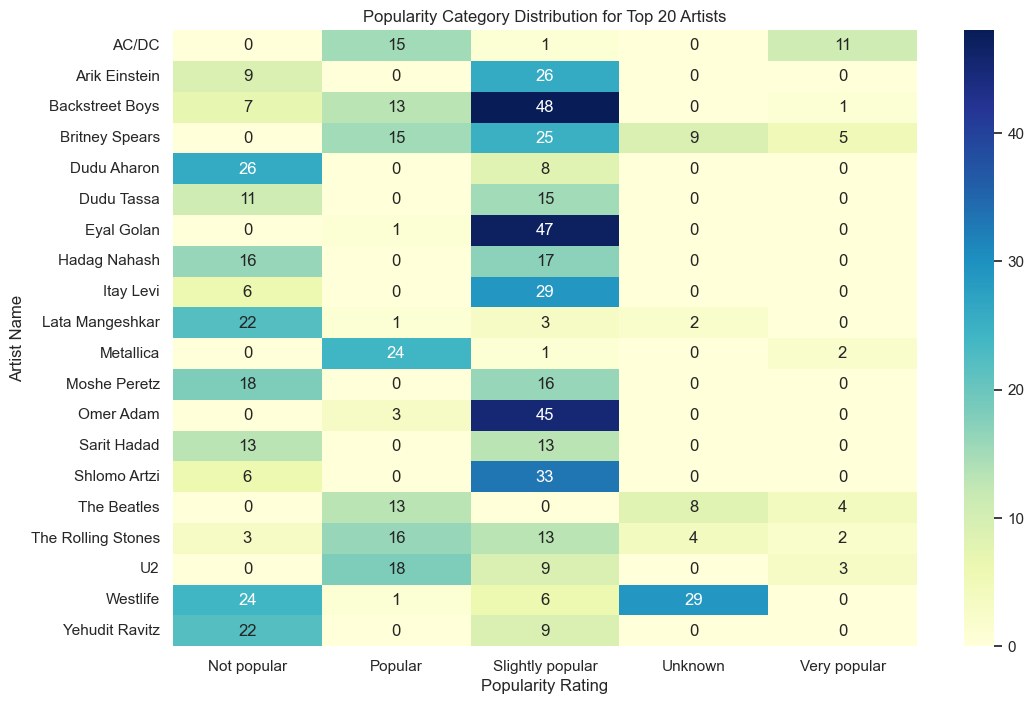

In [88]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(popularity_artist_counts, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Popularity Category Distribution for Top 20 Artists')
plt.xlabel('Popularity Rating')
plt.ylabel('Artist Name')
plt.show()

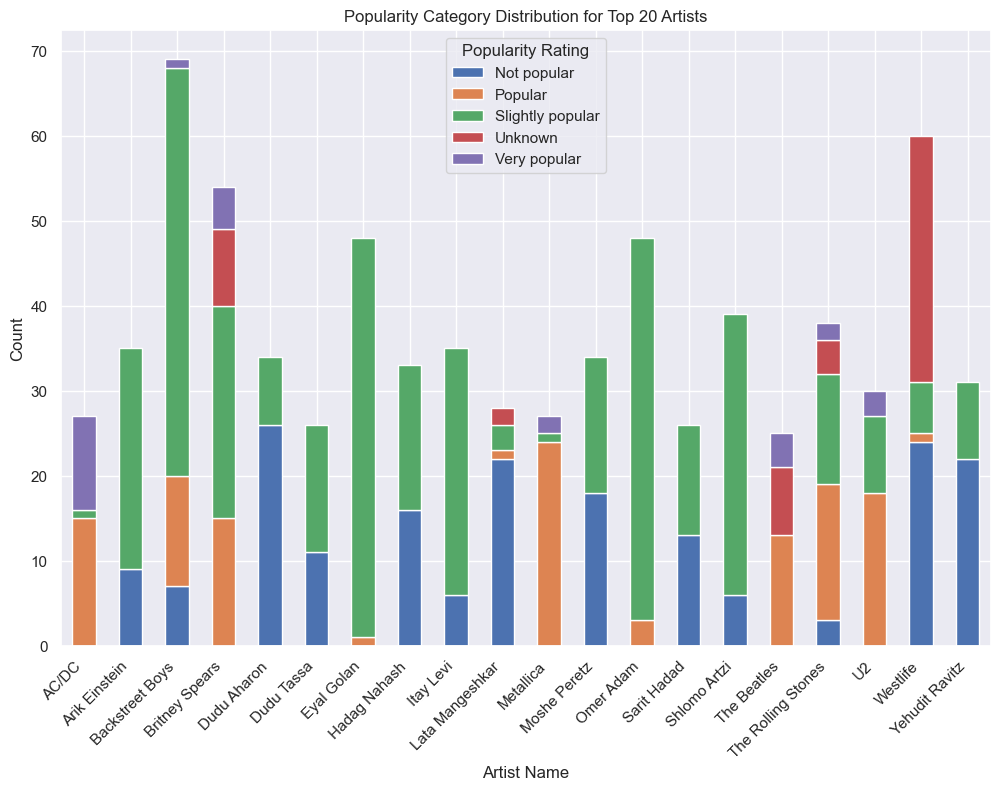

In [89]:
# Create a stacked bar plot
popularity_artist_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Popularity Category Distribution for Top 20 Artists')
plt.xlabel('Artist Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Popularity Rating')
plt.show()

#### Mapping of Class to Genre
We would like to map `Class` numerical genre values to their corresponding genre names using a predefined mapping dataset. This transformation serves to enhance the interpretability and clarity of our data by replacing numerical codes with descriptive genre labels. By doing so, we aim to make the dataset easier to understand and interpretate the genre distribution within the dataset.

In [90]:
mapping_class = {0: 'Acoustic/Folk', 1: 'Alternative', 2: 'Blues', 3: 'Bollywood', 4: 'Country',5: 'HipHop', 6: 'Indie Alternative', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock'}
musicdata_class = pd.DataFrame(musicdata['Class'].map(mapping_class))
musicdata_class.describe()

,Class
count,17996
unique,11
top,Rock
freq,4949


We can see that there are 11 unique genres and `Rock` is the predominant genre in the dataset, appearing most frequently among the songs.

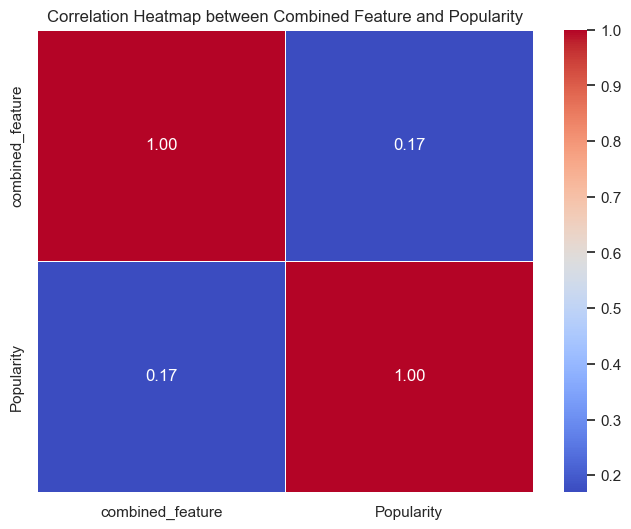

In [91]:
# Calculate the average of 'energy' and 'danceability' for each song
musicdata['combined_feature'] = (musicdata['Class'] + musicdata['danceability']) / 2

# Now, you can calculate the correlation between 'combined_feature' and 'popularity'
#correlation = musicdata['combined_feature'].corr(musicdata['Popularity'])

# Calculate the correlation matrix
correlation_matrix = musicdata[['combined_feature', 'Popularity']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Combined Feature and Popularity')
plt.show()

In [92]:
numeric_musicdata = pd.DataFrame(musicdata[['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']])
numeric_musicdata.describe()

,danceability,energy,speechiness,instrumentalness,liveness,valence
count,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000
mean,0.543433,0.662777,0.079707,0.177562,0.196170,0.486208
std,0.166268,0.235373,0.083576,0.304048,0.159212,0.240195
min,0.059600,0.000020,0.022500,0.000001,0.011900,0.018300
25%,0.432000,0.509000,0.034800,0.000089,0.097500,0.297000
50%,0.545000,0.700000,0.047400,0.003910,0.129000,0.481000
75%,0.659000,0.860000,0.083000,0.200000,0.258000,0.672000
max,0.989000,1.000000,0.955000,0.996000,1.000000,0.986000


<Axes: >

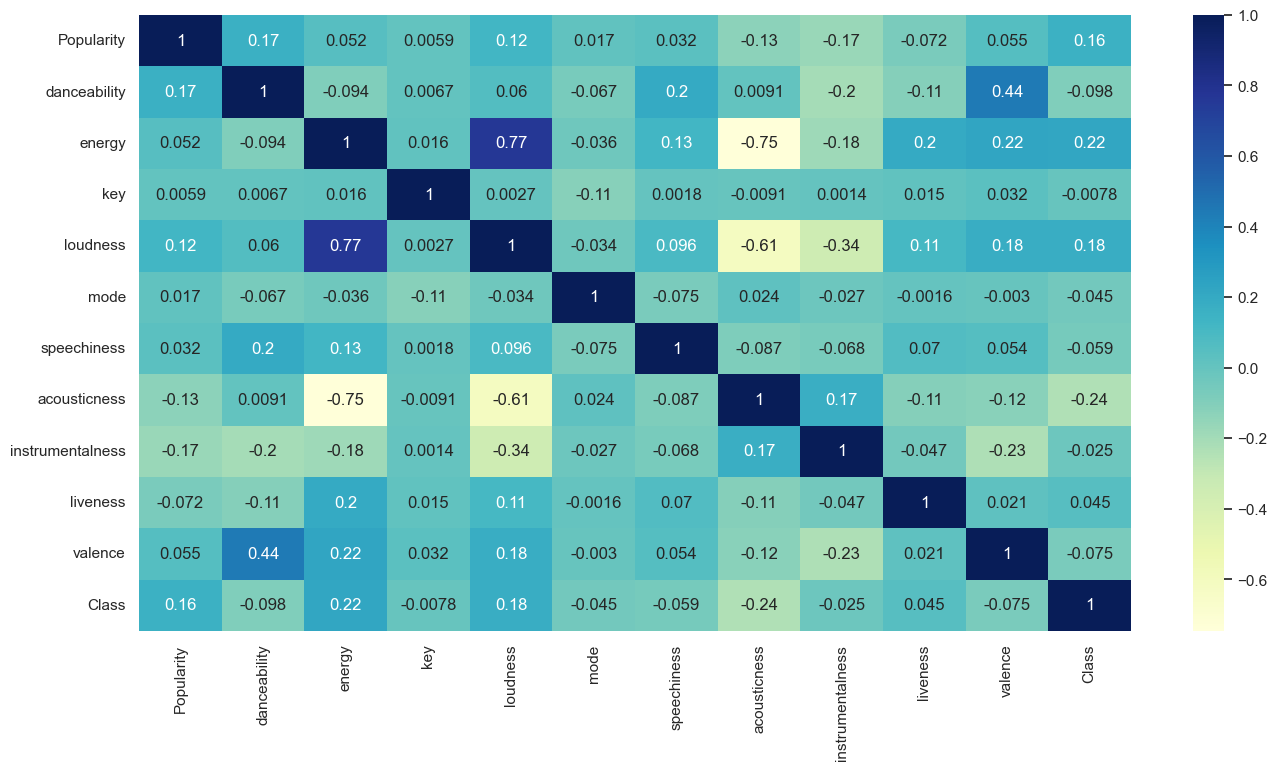

In [93]:
test = pd.DataFrame(musicdata[['Popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'Class']])
plt.figure(figsize=(16, 8))
sb.set(style="whitegrid")
corr = test.corr()
sb.heatmap(corr,annot=True, cmap="YlGnBu")

In [94]:
# Popularity vs Danceability
ggplot(musicdata, aes(x = energy, fill = type)) +   geom_bar(position = "dodge") +  labs(x = "danceability", 
       y = "Number of Observations", 
       fill = "Storm Category")

NameError: name 'ggplot' is not defined

In [95]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Popularity Rating        0
combined_feature         0
dtype: int64

In [96]:
mean_key = musicdata["key"].mean()
mean_key

5.952446502315104

In [97]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Popularity Rating        0
combined_feature         0
dtype: int64

In [98]:
musicdata["key"].fillna(mean_key,inplace=True)

In [99]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Popularity Rating        0
combined_feature         0
dtype: int64

In [100]:
mean_instrumental = musicdata["instrumentalness"].mean()
mean_instrumental

0.1775619253660327

In [101]:
mean_popular = musicdata["Popularity"].mean()
mean_popular

44.51212431693989

In [102]:
musicdata["instrumentalness"].fillna(mean_instrumental,inplace=True)
musicdata["Popularity"].fillna(mean_popular,inplace=True)

In [103]:
musicdata.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Popularity Rating     0
combined_feature      0
dtype: int64

In [104]:
# to find out the number of outliers in numeric variables
df=pd.DataFrame(musicdata[['Popularity', 'danceability', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo']])
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = len(data[(data>upper_bound) | (data<lower_bound)])
    print( f' {var: >15} number of outliers: {outlier: >5} ')
    #print( f' {var: >15} number of outliers: {outlier: >5} ')
    # Remove outliers from the DataFrame
    #cleaned_df = df.drop(outlier.index)
    # Write the cleaned DataFrame to a new CSV file
    #cleaned_df.to_csv('cleaned_file_new.csv', index=False)

      Popularity number of outliers:    41 
    danceability number of outliers:    31 
        loudness number of outliers:   818 
     speechiness number of outliers:  2034 
 instrumentalness number of outliers:  2590 
        liveness number of outliers:   956 
           tempo number of outliers:    36 


In [105]:
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = data[(data>upper_bound) | (data<lower_bound)]
    # Remove outliers from the DataFrame
    cleaned_df = df.drop(outlier.index)

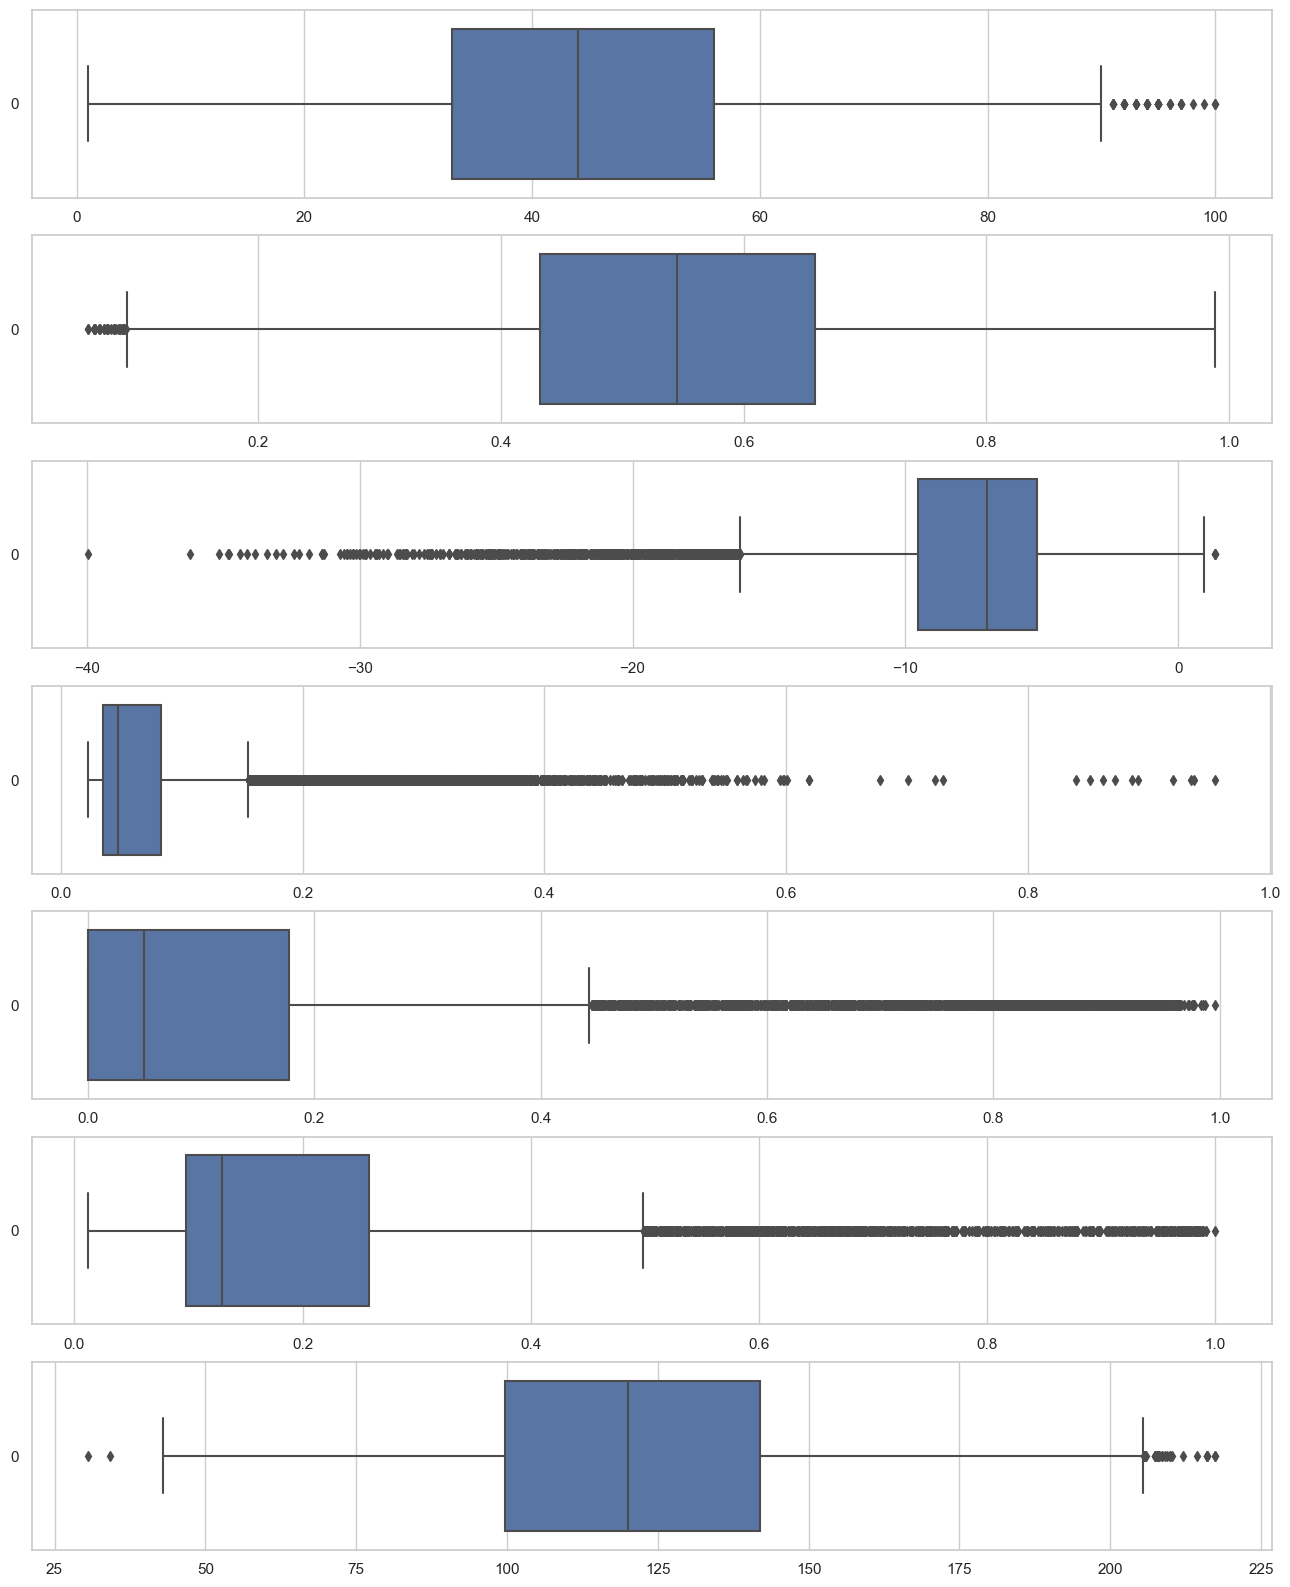

In [106]:
f, axes = plt.subplots(7, figsize=(16, 20))
 
count = 0
for var in df:
    sb.boxplot(data = df[var], orient = "h", ax = axes[count])
    count += 1

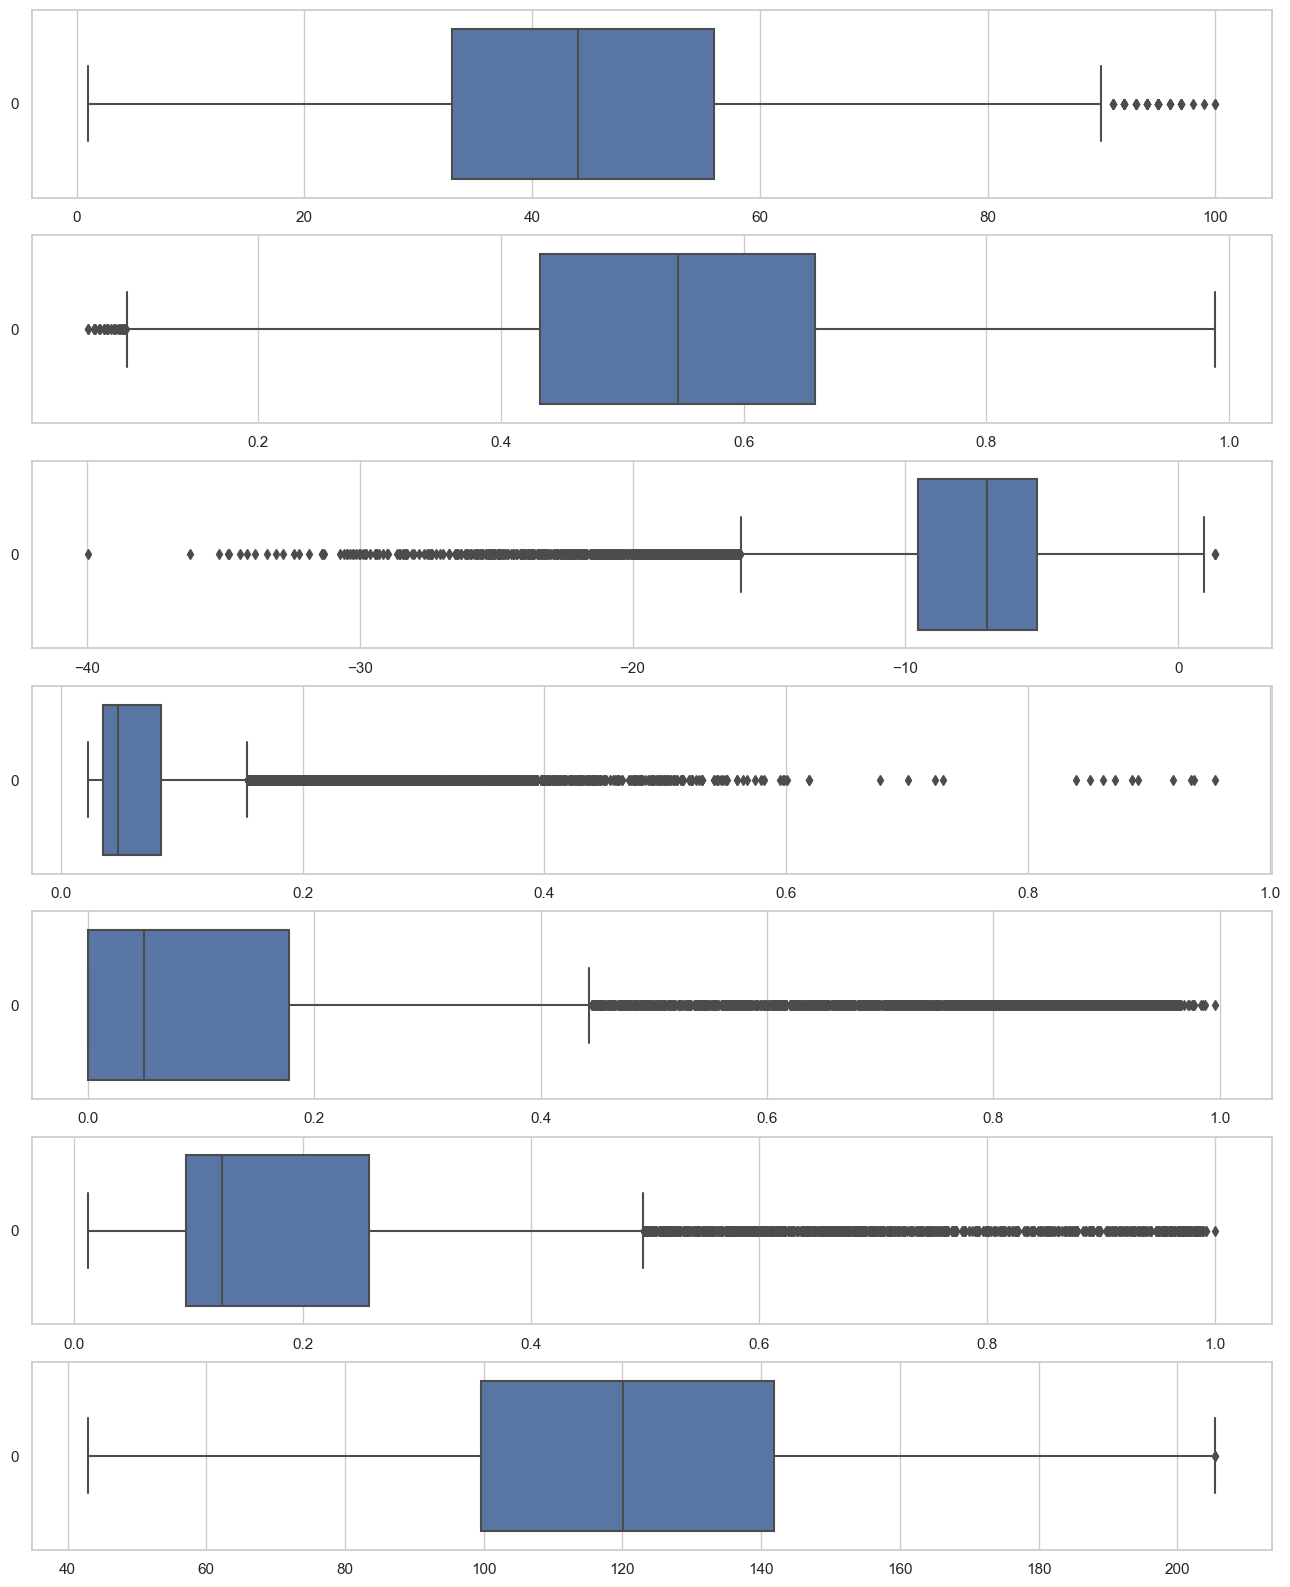

In [107]:
f, axes = plt.subplots(7, figsize=(16, 20))
 
count = 0
for var in cleaned_df:
    sb.boxplot(data = cleaned_df[var], orient = "h", ax = axes[count])
    count += 1

In [108]:
# to find out the number of outliers in numeric variables
df=pd.DataFrame(musicdata[['Popularity']])
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = (data[(data>upper_bound) | (data<lower_bound)])
    #print( f' {var: >15} number of outliers: {outlier: >5} ')
    # Remove outliers from the DataFrame
    cleaned_df = df.drop(outlier.index)
    # Write the cleaned DataFrame to a new CSV file
    cleaned_df.to_csv('cleaned_file_.csv', index=False)

In [109]:
categorical_cols = musicdata[musicdata.columns[(musicdata.dtypes == 'object') | (musicdata.dtypes == 'bool')]]
categorical_cols.shape

(17996, 3)

In [110]:
categorical_cols.sample(5)

,Artist Name,Track Name,Popularity Rating
1993,Fit For An Autopsy,Fear Tomorrow,Slightly popular
1419,Arik Einstein,◊ê◊î◊ë◊î ◊û◊û◊ë◊ò ◊®◊ê◊©◊ï◊ü,Slightly popular
6823,Teddy Wilson,Fools Rush In,Slightly popular
14148,Doja Cat,Ain't Shit,Very popular
9507,An Autumn for Crippled Children,Splendour Unnoticed,Slightly popular


In [111]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Artist Name        17996 non-null  object
 1   Track Name         17996 non-null  object
 2   Popularity Rating  17996 non-null  object
dtypes: object(3)
memory usage: 421.9+ KB


In [112]:
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
dist_categorical_cols

,Missing Values,Missing Percentage
Artist Name,0,0.0
Track Name,0,0.0
Popularity Rating,0,0.0


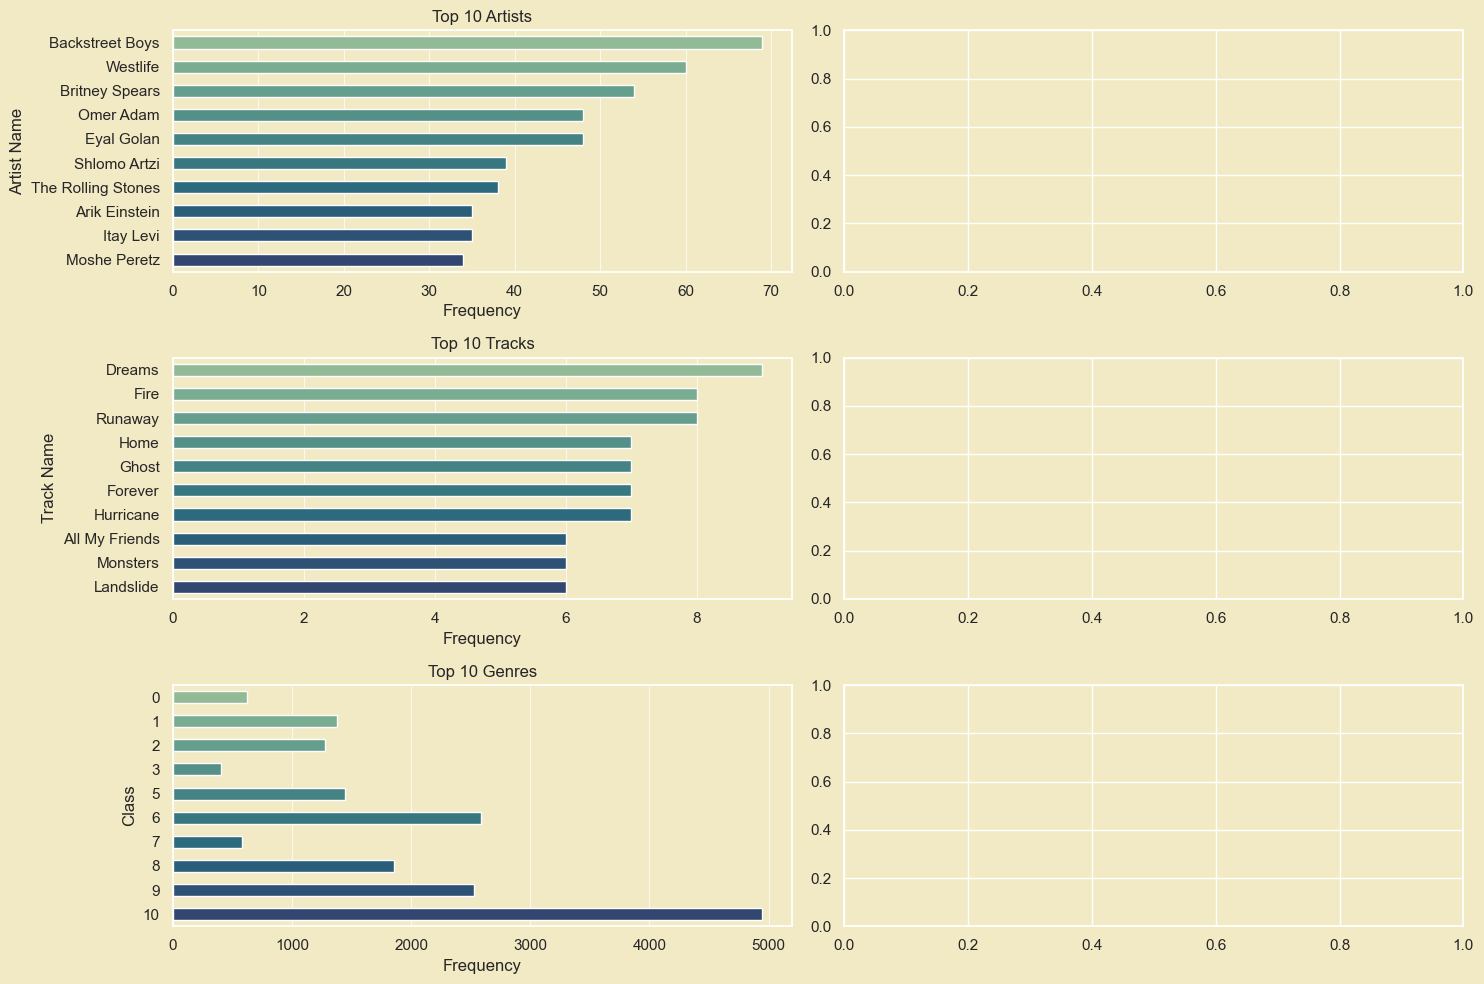

In [113]:
top_n = 10
sb.set_style('darkgrid')
sb.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = musicdata['Artist Name'].value_counts().head(top_n)
top_tracks = musicdata['Track Name'].value_counts().head(top_n)
top_genres = musicdata['Class'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Plotting
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

    # Top N Artists
    sb.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sb.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sb.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[2, 0], orient='h', zorder=3, width=0.5)
    axes[2, 0].set_title(f'Top {top_n} Genres')
    axes[2, 0].set_xlabel('Frequency')
    axes[2, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()


In [114]:
numerical_cols = musicdata[musicdata.columns[(musicdata.dtypes == 'float64') | (musicdata.dtypes == 'int64')]]
numerical_cols.shape

(17996, 16)

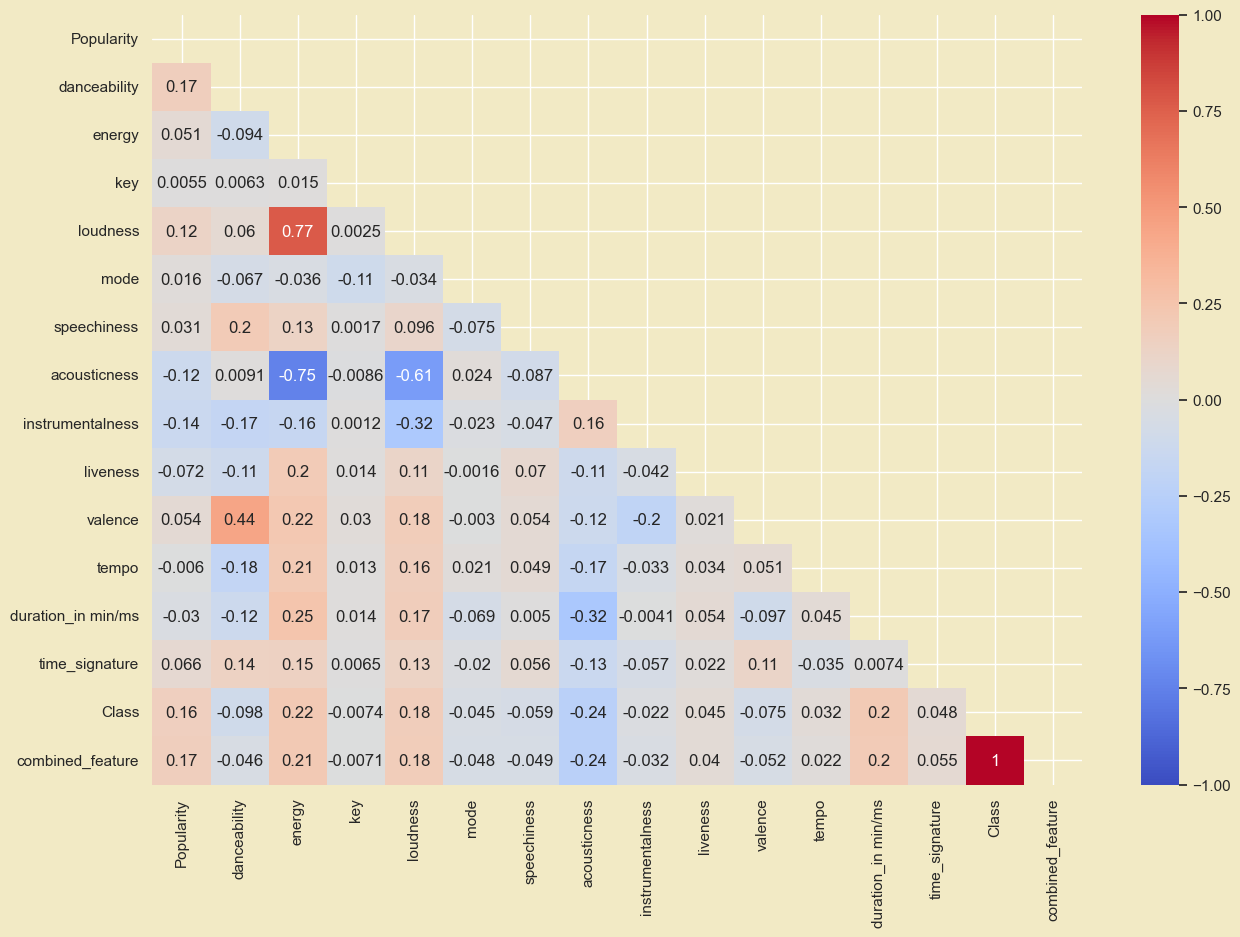

In [115]:
corr = numerical_cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.set_style('white')
sb.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(15, 10))
sb.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

The correlation for most of the columns are very low. The columns with the highest correlation are loudness and energy with a correlation of 0.77.

Creating Modals

In [174]:
musicdata_test = pd.read_csv('test.csv')
musicdata_test['Popularity Rating'] = musicdata_test.apply(lambda row: popularity(row), axis=1)

In [185]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder()
predictor_arrays = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

musicdata_popularity_rating = pd.DataFrame(musicdata['Popularity Rating'].astype('category'))
musicdata_predictor = pd.DataFrame(musicdata[predictor_arrays])

ohe.fit(musicdata_popularity_rating)
musicdata_popularity_rating_ohe = pd.DataFrame(ohe.transform(musicdata_popularity_rating).toarray(), columns=ohe.get_feature_names_out(musicdata_popularity_rating.columns))

dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(musicdata_predictor, musicdata_popularity_rating_ohe)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(musicdata_predictor, musicdata_popularity_rating_ohe))
print()

#Print the Classification Accuracy for Test Dataset
musicdata_test_popularity_rating = pd.DataFrame(musicdata_test['Popularity Rating'].astype('category'))
musicdata_test_predictor = pd.DataFrame(musicdata_test[predictor_arrays])

ohe.fit(musicdata_test_popularity_rating)
musicdata_test_popularity_rating_ohe = pd.DataFrame(ohe.transform(musicdata_test_popularity_rating).toarray(), columns=ohe.get_feature_names_out(musicdata_test_popularity_rating.columns))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(musicdata_test_predictor, musicdata_test_popularity_rating_ohe))
print()



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.16881529228717493

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.1623233501879943



[Text(0.5, 0.9, 'instrumentalness <= 0.321\ngini = 0.254\nsamples = 17996\nvalue = [[15696, 2300]\n[12549, 5447]\n[8934, 9062]\n[17568, 428]\n[17237, 759]]'),
 Text(0.25, 0.7, 'danceability <= 0.611\ngini = 0.258\nsamples = 15079\nvalue = [[13295, 1784]\n[10106, 4973]\n[7865, 7214]\n[14716, 363]\n[14334, 745]]'),
 Text(0.125, 0.5, 'acousticness <= 0.079\ngini = 0.251\nsamples = 9529\nvalue = [[8333, 1196]\n[6597, 2932]\n[4654, 4875]\n[9292, 237]\n[9240, 289]]'),
 Text(0.0625, 0.3, 'acousticness <= 0.001\ngini = 0.239\nsamples = 5385\nvalue = [[4914, 471]\n[3593, 1792]\n[2515, 2870]\n[5287, 98]\n[5231, 154]]'),
 Text(0.03125, 0.1, 'gini = 0.223\nsamples = 1919\nvalue = [[1736, 183]\n[1390, 529]\n[774, 1145]\n[1878, 41]\n[1898, 21]]'),
 Text(0.09375, 0.1, 'gini = 0.244\nsamples = 3466\nvalue = [[3178, 288]\n[2203, 1263]\n[1741, 1725]\n[3409, 57]\n[3333, 133]]'),
 Text(0.1875, 0.3, 'acousticness <= 0.8\ngini = 0.263\nsamples = 4144\nvalue = [[3419, 725]\n[3004, 1140]\n[2139, 2005]\n[4005,

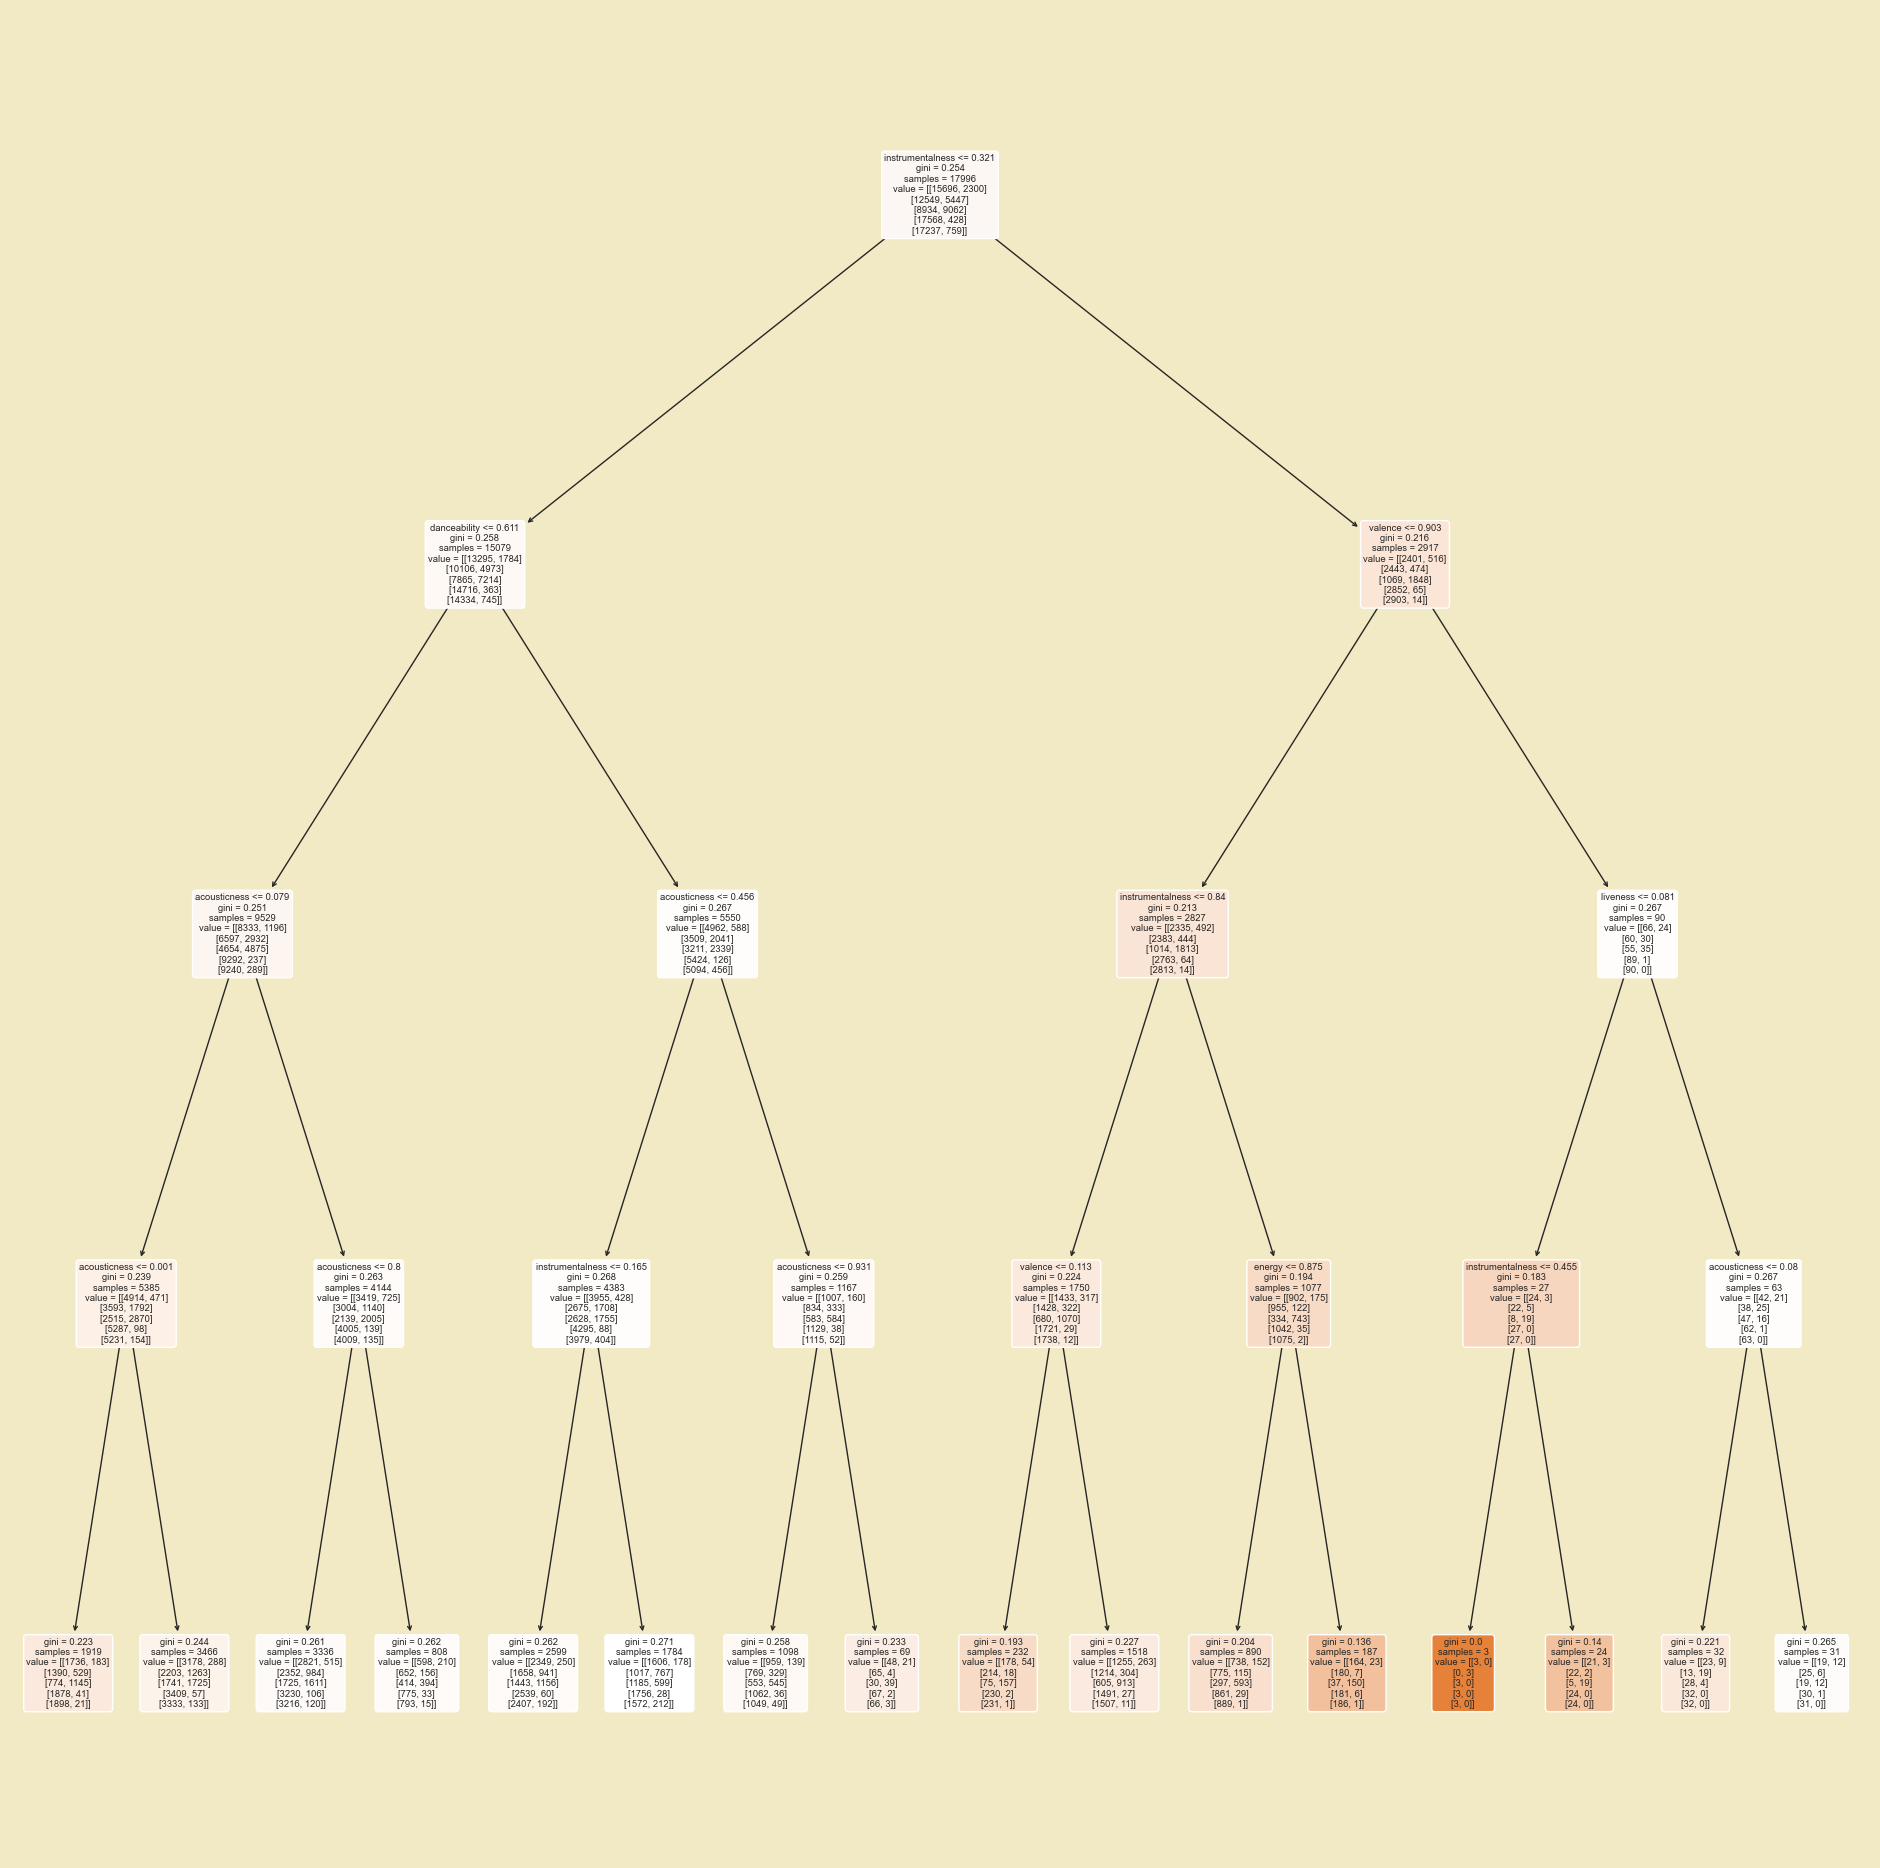

In [171]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=list(musicdata_predictor.columns), 
          class_names=list(ohe.get_feature_names_out(musicdata_popularity_rating.columns)))

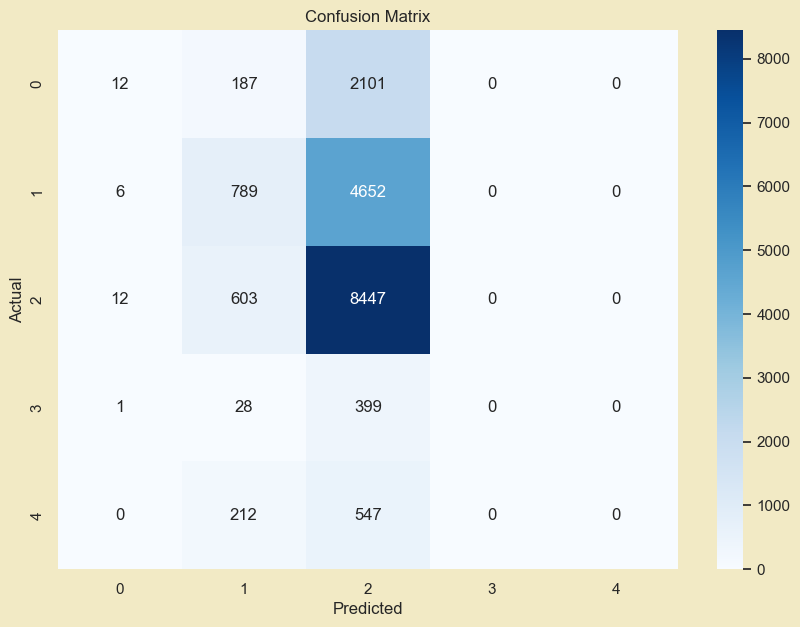

In [180]:
from sklearn.metrics import confusion_matrix

# Extract target variable and convert it to categorical type
musicdata['Popularity Rating'] = musicdata['Popularity Rating'].astype('category')

# Create and fit the Decision Tree classifier
dectree = DecisionTreeClassifier(max_depth=4)  # You can change max_depth to experiment
dectree.fit(musicdata_predictor, musicdata['Popularity Rating'])

# Predict
predicted = dectree.predict(musicdata_predictor)

# Create confusion matrix
cm = confusion_matrix(musicdata['Popularity Rating'], predicted)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


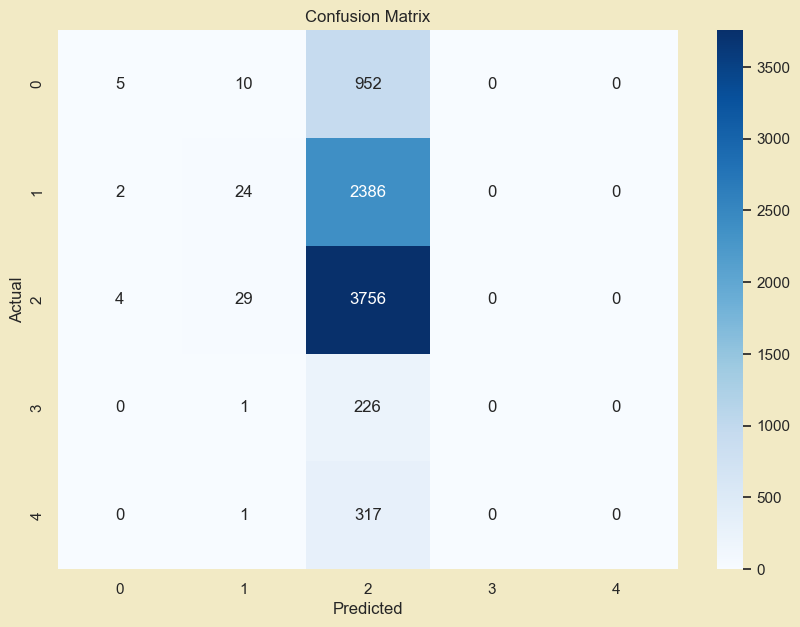

In [181]:
# Extract target variable and convert it to categorical type
musicdata_test['Popularity Rating'] = musicdata_test['Popularity Rating'].astype('category')

# Predict
predicted_test = dectree.predict(musicdata_test_predictor)

# Create confusion matrix
cm_test = confusion_matrix(musicdata_test['Popularity Rating'], predicted_test)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()